<a href="https://colab.research.google.com/github/Adedotun-Adepoju/Tweet-Sentiment-analysis/blob/main/Tweet_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_df=pd.read_csv('/content/gdrive/My Drive/iQube/New folder/Corona_NLP_train.csv', encoding='utf-8')
test_df=pd.read_csv('/content/gdrive/My Drive/iQube/Corona_NLP_test.csv', encoding='utf-8')

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# View the shape of the training date
train_df.shape

(41157, 6)

In [ ]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
train_df['OriginalTweet']=train_df['OriginalTweet'].str.lower()

In [ ]:
# View the shape of the test data
test_df.shape

(3798, 6)

In [ ]:
# Show the data types
train_df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [ ]:
test_df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [ ]:
# Check if there are missing values in the each column
train_df.isnull().any()

UserName         False
ScreenName       False
Location          True
TweetAt          False
OriginalTweet    False
Sentiment        False
dtype: bool

In [ ]:
# calculate the percentage of missing values in the location column
missing_pct= train_df['Location'].isnull().sum()/train_df.shape[0]
print('The percentage of missing values in the Location column is {} and the number of missing values is {}'.format(missing_pct*100,train_df['Location'].isnull().sum()))

The percentage of missing values in the Location column is 20.87129771363316 and the number of missing values is 8590


In [ ]:
# Check for duplicates in the train set
train_df.duplicated().any()

False

Text(0, 0.5, 'Number of tweets')

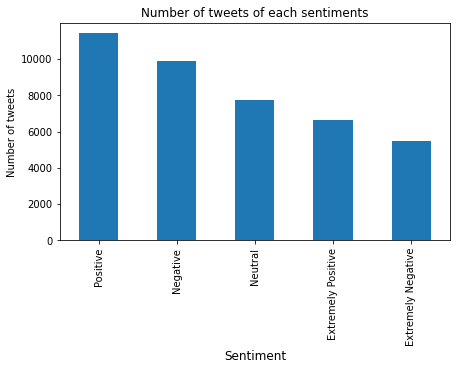

In [ ]:
# Number of tweets f different sentiments
train_df.Sentiment.value_counts().plot.bar(figsize=(7,4))
plt.xticks()
plt.title('Number of tweets of each sentiments',fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets')

In [ ]:
# Give numeric values the sentiments
train_df['Sentiment'] = train_df['Sentiment'].map({'Extremely Positive':2, 'Positive':2, 'Neutral':1, 'Negative':0, 'Extremely Negative':0})
test_df['Sentiment']= test_df['Sentiment'].map({'Extremely Positive':2, 'Positive':2, 'Neutral':1, 'Negative':0, 'Extremely Negative':0})

In [ ]:
# Only one feature will be used to train the model
train_df= train_df[['OriginalTweet','Sentiment']]
test_df= test_df[['OriginalTweet','Sentiment']]

In [ ]:
# Remove unnecessary characters and change to lowercase
train_df.OriginalTweet = train_df.OriginalTweet.str.replace(r'\W+',' ')
train_df.OriginalTweet = train_df.OriginalTweet.str.replace(r'http\S+','')
train_df.OriginalTweet = train_df.OriginalTweet.str.lower()

In [ ]:
test_df.OriginalTweet = test_df.OriginalTweet.str.replace(r'\W+',' ')
test_df.OriginalTweet = test_df.OriginalTweet.str.replace(r'http\S+','')
test_df.OriginalTweet = test_df.OriginalTweet.str.lower()

In [ ]:
# Import Libraries useful for natural language processing
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
lemma = nltk.WordNetLemmatizer()

In [ ]:
# create a new column to store edited values
train_df['processed_tweets']= [lemma.lemmatize(word) for word in train_df.OriginalTweet]

test_df['processed_tweets']= [lemma.lemmatize(word) for word in test_df.OriginalTweet]

In [ ]:
train_df.head()

,OriginalTweet,Sentiment,processed_tweets
0,menyrbie phil_gahan chrisitv t co ifz9fan2pa...,1,menyrbie phil_gahan chrisitv t co ifz9fan2pa...
1,advice talk to your neighbours family to excha...,2,advice talk to your neighbours family to excha...
2,coronavirus australia woolworths to give elder...,2,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,2,my food stock is not the only one which is emp...
4,me ready to go at supermarket during the covid...,0,me ready to go at supermarket during the covid...


In [ ]:
# train and validation split
from sklearn.model_selection import train_test_split
X= train_df['processed_tweets']
y=train_df['Sentiment']
X_test=test_df['processed_tweets']
y_test= test_df['Sentiment']
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(X,y,test_size=0.8)

In [ ]:
# Create a tfidf vectorizer to vectorize the features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer(stop_words='english',use_idf=True, lowercase=False)
tfidf_vectorizer.fit(x_train)

x_train_vec= tfidf_vectorizer.transform(x_train)
x_val_vec= tfidf_vectorizer.transform(x_val)
x_test_vect= tfidf_vectorizer.transform(X_test)

In [ ]:
# Create the  count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english').fit(X)

# transform both train and valid data
x_train_vector = vectorizer.transform(x_train)
x_test_vector= tfidf_vectorizer.transform(X_test)
x_val_vector = vectorizer.transform(x_val)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# cross validation score of the tfidl vectorization
cross_val_score(LogisticRegression(random_state=70), x_train_vec, y_train, cv=10, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


0.6872813174627517

In [ ]:
# cross validation score of the count vectorization
cross_val_score(LogisticRegression(random_state=70), x_train_vector, y_train, cv=10, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.4s finished


0.7215429579209381

In [ ]:
# Create a logistic regression model using count vectoized features
log_model= LogisticRegression(C= 1, penalty='l1',solver='saga')
log_model.fit(x_train_vector, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make predictions on the validation set
y_pred= log_model.predict(x_val_vector)

In [ ]:
np.unique(y_pred)

array([0, 1, 2])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     12363
           1       0.61      0.68      0.64      6137
           2       0.80      0.79      0.80     14426

    accuracy                           0.75     32926
   macro avg       0.73      0.74      0.73     32926
weighted avg       0.75      0.75      0.75     32926



## USING LSTM

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
x_df=train_df['OriginalTweet'].copy()
y_df=train_df['Sentiment'].copy()

In [ ]:
y_df.value_counts()

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_df)
vocab_size = len(tokenizer.word_index) + 1
print('vocabulary size:{}'.format(vocab_size))

max_len = max(x_df.apply(len))
print('max length of input:{}'.format(max_len))

sequence = tokenizer.texts_to_sequences(x_df)

x = pad_sequences(sequence, max_len, padding='post')
print('example x:{}'.format(x[4]))

vocabulary size:80061
max length of input:307
example x:[   91   766     2    83    21    23    59     1    37   144    40   111
    15   101  4364    53   111    42    22    87    13 23788   233     1
     9    13     7   878   328    53    98   129     3    70    26  1790
   452 23789 11402   402  4681     3     4 23790     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0  

In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
embedding_dim=16
model = Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    layers.Bidirectional(layers.GRU(256, return_sequences=True)),
    layers.GlobalMaxPool1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='sigmoid')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 307, 16)           1280976   
_________________________________________________________________
bidirectional (Bidirectional (None, 307, 512)          420864    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,734,867
Trainable params: 1,734,867
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y_df, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/4
579/579 [==============================] - 47s 66ms/step - loss: 0.8669 - accuracy: 0.5698 - val_loss: 0.4272 - val_accuracy: 0.8547
Epoch 2/4
579/579 [==============================] - 37s 64ms/step - loss: 0.3440 - accuracy: 0.8896 - val_loss: 0.4003 - val_accuracy: 0.8678
Epoch 3/4
579/579 [==============================] - 38s 65ms/step - loss: 0.1904 - accuracy: 0.9369 - val_loss: 0.4882 - val_accuracy: 0.8550
Epoch 4/4
579/579 [==============================] - 38s 65ms/step - loss: 0.1100 - accuracy: 0.9627 - val_loss: 0.5484 - val_accuracy: 0.8525
